In [1]:
import tensorflow as tf
from tensorflow import keras
tf.__version__

'2.16.1'

In [2]:
fashion_mnist = keras.datasets.fashion_mnist
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()


In [3]:
X_train_full.shape

(60000, 28, 28)

In [4]:
y_train_full.shape

(60000,)

In [5]:
y_train_full

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

# Forming Valid and Train Value

In [90]:
X_valid = X_train_full[:5000]/255
X_train = X_train_full[5000:]/255
Y_valid,Y_train = y_train_full[:5000],y_train_full[5000:]

In [91]:
X_train.shape

(55000, 28, 28)

# Model Preparation using Keras

In [92]:
model = keras.models.Sequential()

In [93]:
#Convert 28x28 to 1D array
model.add(keras.layers.Flatten(input_shape=(28,28)))

In [94]:
model.add(keras.layers.Dense(300,activation='relu'))

In [95]:
model.add(keras.layers.Dense(100,activation='relu'))

In [96]:
model.add(keras.layers.Dense(100,activation='relu'))

In [97]:
model.add(keras.layers.Dense(10,activation='softmax'))


In [98]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten_3 (Flatten)                  │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ (None, 300)                 │         235,500 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_10 (Dense)                     │ (None, 100)                 │          30,100 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_11 (Dense)                     │ (None, 100)                 │          10,100 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_12 (Dense)                     │ (None, 10)                  │           1,010 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 276,710 (1.06 MB)

 Trainable params: 276,710 (1.06 MB)

 Non-trainable params: 0 (0.00 B)

In [86]:
model.pop()

<Flatten name=flatten_2, built=True>

In [99]:
model.layers

[<Flatten name=flatten_3, built=True>,
 <Dense name=dense_9, built=True>,
 <Dense name=dense_10, built=True>,
 <Dense name=dense_11, built=True>,
 <Dense name=dense_12, built=True>]

In [100]:
model.layers[3]

<Dense name=dense_11, built=True>

# Compliling the data ->(Choosing the Loss Function,which type of gradient descent stocastic or batch,score)

In [101]:
model.compile(loss="sparse_categorical_crossentropy",optimizer='sgd',metrics=['accuracy'])

# Training / Fitting the data

In [102]:
hist = model.fit(X_train,Y_train,epochs=10,validation_data=(X_valid,Y_valid),batch_size=28)

Epoch 1/10
1965/1965 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.6723 - loss: 1.0151 - val_accuracy: 0.8134 - val_loss: 0.5279
Epoch 2/10
1965/1965 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8305 - loss: 0.4894 - val_accuracy: 0.8308 - val_loss: 0.4696
Epoch 3/10
1965/1965 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8460 - loss: 0.4363 - val_accuracy: 0.8110 - val_loss: 0.5683
Epoch 4/10
1965/1965 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8557 - loss: 0.4039 - val_accuracy: 0.8494 - val_loss: 0.4191
Epoch 5/10
1965/1965 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8689 - loss: 0.3679 - val_accuracy: 0.8604 - val_loss: 0.3958
Epoch 6/10
1965/1965 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.8721 - loss: 0.3579 - val_accuracy: 0.8528 - val_loss: 0.3979
Epoch 7/10
1965/1965 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8774 - loss: 0.3466 - val_accuracy: 0.8694 - val_loss: 0.3672
Epoch 8/10
1965/1965 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8846 - loss: 0.3251 - 

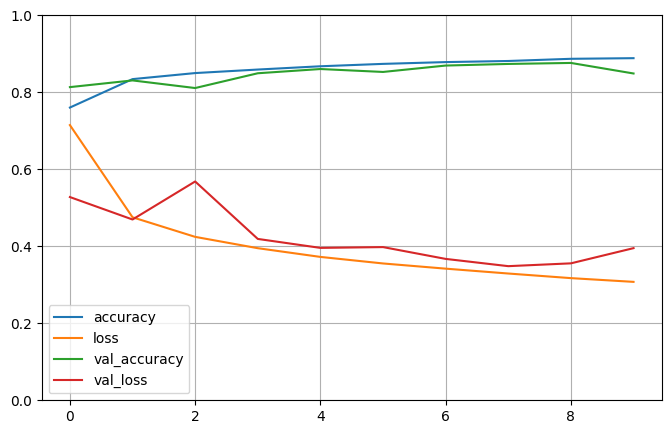

In [103]:
import pandas as pd
import matplotlib.pyplot as plt
pd.DataFrame(hist.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1) # set the vertical range to [0-1]
plt.show()


In [105]:
model.evaluate(X_test, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 803us/step - accuracy: 0.8139 - loss: 70.6095


[71.3985595703125, 0.8133000135421753]

# Conclusion
### Ac